In [3]:
import numpy as np
import pandas as pd

data1 = pd.read_csv('TowStep_Data/ProlificData/v3/FullTrial.csv')
data2 = pd.read_csv('TowStep_Data/EyeTrackingData/FullTrial.csv')
data1 = data1.dropna(subset=['difficulty_2'])
data2 = data2.dropna(subset=['difficulty_2'])

In [2]:
data1.head()

,Unnamed: 0,graph,reward,trialNumber,difficulty,difficulty_2,type,wid,RT_first_visit,RT_second_visit,RT,max_reward,current_reward,loss,accuracy,accuracy_1,df
0,0,"[[7, 8], [], [3, 4], [4, 1], [], [], [], [5, 6...","[None, 0, -2, -3, 0, -3, 2, -4, -3, 0]",1,3,NaN,best_min,wdf61453,5060.0,1976.0,7036,-2,-3,1,0,0,1
1,1,"[[2, 8], [], [8], [], [3, 7], [], [9, 4], [], ...","[1, -1, 0, 1, -1, 0, None, 4, -1, -4]",2,6,5.0,best_second,wdf61453,2667.0,2400.0,5067,3,3,0,1,1,2
2,2,"[[], [], [], [], [9, 2], [0], [3, 8], [6, 5], ...","[1, 1, 0, -4, 0, 4, -4, None, 2, 3]",3,10,NaN,best_alone,wdf61453,2127.0,5453.0,7580,5,5,0,1,1,1
3,3,"[[], [], [], [6], [9, 1], [3, 6], [], [8, 4], ...","[3, -2, 1, 3, 0, -2, 0, None, -2, -3]",4,3,2.0,best_second,wdf61453,1883.0,2348.0,4231,1,-2,3,0,0,2
4,4,"[[4, 6], [], [9, 7], [], [6, 8], [], [], [5], ...","[1, 1, None, -1, 4, 3, 0, 2, 4, -4]",5,9,NaN,best_alone,wdf61453,2495.0,1769.0,4264,5,5,0,1,1,1


In [12]:
def bootstrap_means(data, n_bootstrap=10000):
    """ Returns an array of bootstrap sample means """
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = data.sample(n=len(data), replace=True)
        bootstrap_means.append(sample['RT_second_visit'].mean())
    return np.array(bootstrap_means)
n_bootstrap = 10000  # Number of bootstrap samples
means_data1 = bootstrap_means(data1, n_bootstrap=n_bootstrap)
means_data2 = bootstrap_means(data2, n_bootstrap=n_bootstrap)


In [13]:
# Calculate differences in means
diff_means = means_data2 - means_data1
print(f"Mean difference: {np.mean(diff_means)}")
# Calculate power (assuming we are testing if data2 is greater than data1)
power = np.mean(diff_means > 0)
print(f"Estimated power of the test: {power}")


Mean difference: -1530.8748829376786
Estimated power of the test: 0.0


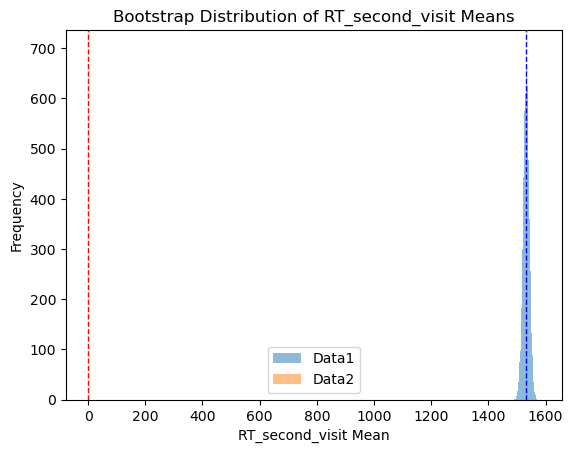

In [14]:
import matplotlib.pyplot as plt

plt.hist(means_data1, bins=50, alpha=0.5, label='Data1')
plt.hist(means_data2, bins=50, alpha=0.5, label='Data2')
plt.axvline(np.mean(means_data1), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(means_data2), color='red', linestyle='dashed', linewidth=1)
plt.legend()
plt.title('Bootstrap Distribution of RT_second_visit Means')
plt.xlabel('RT_second_visit Mean')
plt.ylabel('Frequency')
plt.show()
